<h1> Lab 6: Clustering and Similarity</h1>

Make sure you have file preamble.py and mglearn in same folder

In [1]:
%matplotlib inline
from preamble import *
plt.rcParams['image.cmap'] = "gray"

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor


## KNN and Overfitting

### Hellerup Housing Prices

## Question 1
Read the HomesSoldHellerup.csv file into a data frame like you did in the previous lab, and create an X feature vector with 'm2','Build Year','Type of Sale',  and 'Type', using get_dummies to create dummy values.

In [2]:
homes_df = pd.read_csv('HomesSoldHellerup.csv', sep=',')

X = pd.get_dummies(homes_df[['m2','Build Year','Type of Sale', 'Type' ]])
y = homes_df['Price']



## Question 2
Create a knn regressor model for the Housing data where n_neighbors=1.

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

kn = KNeighborsRegressor(n_neighbors=1)
kn.fit(X_train,y_train)
trainRes = kn.score(X_train,y_train)
testRes = kn.score(X_test,y_test)
n=1
print("{:>2d} neighbor Train: {:.3f}  Test: {:.3f}".format(n,trainRes,testRes))



 1 neighbor Train: 0.968  Test: 0.370


## Question 3
What is the default value for the <i>weights</i> parameter for KNeighborsRegressor?

In [4]:
kn

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=1, p=2,
          weights='uniform')

In [5]:
the default value is "uniform"

SyntaxError: invalid syntax (<ipython-input-5-9018c988916f>, line 1)

## Question 4
Make a loop where you try values for n_neighbors ranging from 5 up to 100 by increments of 5, and print the results.


In [6]:
res = []
for n in range (5,100,5):
    kn = KNeighborsRegressor(n_neighbors=n)
    kn.fit(X_train,y_train)
    trainRes = kn.score(X_train,y_train)
    testRes = kn.score(X_test,y_test)
    diff = trainRes - testRes
    res.append((n, trainRes,testRes,diff))
    
for r in res:   
    print("{:>2d} neighbors  Train: {:.3f}  Test: {:.3f}  Diff: {:.3f}".format(r[0],r[1],r[2],r[3]))


 5 neighbors  Train: 0.760  Test: 0.552  Diff: 0.209
10 neighbors  Train: 0.704  Test: 0.545  Diff: 0.160
15 neighbors  Train: 0.664  Test: 0.535  Diff: 0.128
20 neighbors  Train: 0.652  Test: 0.523  Diff: 0.129
25 neighbors  Train: 0.633  Test: 0.502  Diff: 0.131
30 neighbors  Train: 0.625  Test: 0.507  Diff: 0.118
35 neighbors  Train: 0.615  Test: 0.492  Diff: 0.123
40 neighbors  Train: 0.608  Test: 0.480  Diff: 0.129
45 neighbors  Train: 0.604  Test: 0.471  Diff: 0.133
50 neighbors  Train: 0.606  Test: 0.467  Diff: 0.139
55 neighbors  Train: 0.604  Test: 0.461  Diff: 0.142
60 neighbors  Train: 0.603  Test: 0.460  Diff: 0.143
65 neighbors  Train: 0.602  Test: 0.458  Diff: 0.144
70 neighbors  Train: 0.600  Test: 0.452  Diff: 0.148
75 neighbors  Train: 0.598  Test: 0.450  Diff: 0.148
80 neighbors  Train: 0.596  Test: 0.447  Diff: 0.150
85 neighbors  Train: 0.594  Test: 0.443  Diff: 0.151
90 neighbors  Train: 0.593  Test: 0.444  Diff: 0.149
95 neighbors  Train: 0.590  Test: 0.439  Diff:

## Question 5

Print the above results together with the difference between the train and test scores, and sort the results by that value. To do this, you can construct list of a tuples with 4 elements for each iteration:  

(difference, n_neighbors, trainScore, testScore).

Then you can use the function <b>sorted</b> to sort the list -- if the difference is the first element of each tuple, the list will be sorted on that value.

For which value on n_neighbors is there the most overfitting? 

In [7]:
res = []
for n in range (5,100,5):
    kn = KNeighborsRegressor(n_neighbors=n)
    kn.fit(X_train,y_train)
    trainRes = kn.score(X_train,y_train)
    testRes = kn.score(X_test,y_test)
    diff = trainRes - testRes
    res.append((diff, n, trainRes,testRes))
    

for r in sorted(res):   
    print("{:>2d} neighbors  Train: {:.3f}  Test: {:.3f}  Diff: {:.3f}".format(r[1],r[2],r[3],r[0]))


30 neighbors  Train: 0.625  Test: 0.507  Diff: 0.118
35 neighbors  Train: 0.615  Test: 0.492  Diff: 0.123
15 neighbors  Train: 0.664  Test: 0.535  Diff: 0.128
40 neighbors  Train: 0.608  Test: 0.480  Diff: 0.129
20 neighbors  Train: 0.652  Test: 0.523  Diff: 0.129
25 neighbors  Train: 0.633  Test: 0.502  Diff: 0.131
45 neighbors  Train: 0.604  Test: 0.471  Diff: 0.133
50 neighbors  Train: 0.606  Test: 0.467  Diff: 0.139
55 neighbors  Train: 0.604  Test: 0.461  Diff: 0.142
60 neighbors  Train: 0.603  Test: 0.460  Diff: 0.143
65 neighbors  Train: 0.602  Test: 0.458  Diff: 0.144
70 neighbors  Train: 0.600  Test: 0.452  Diff: 0.148
75 neighbors  Train: 0.598  Test: 0.450  Diff: 0.148
90 neighbors  Train: 0.593  Test: 0.444  Diff: 0.149
80 neighbors  Train: 0.596  Test: 0.447  Diff: 0.150
95 neighbors  Train: 0.590  Test: 0.439  Diff: 0.150
85 neighbors  Train: 0.594  Test: 0.443  Diff: 0.151
10 neighbors  Train: 0.704  Test: 0.545  Diff: 0.160
 5 neighbors  Train: 0.760  Test: 0.552  Diff:

## Question 6

Create a knn regressor model for the Housing data with weights set to "distance" and n_neighbors = 1. Then make a loop where you try values for n_neighbors ranging from 5 up to 100 by increments of 5, with weights = "distance". This time, sort the values by the test score. 

How do the results compare to those with the default value for weights?

Default value is "uniform"

In [8]:
res = []
for n in range (5,100,5):
    kn = KNeighborsRegressor(n_neighbors=n, weights="distance")
    kn.fit(X_train,y_train)
    trainRes = kn.score(X_train,y_train)
    testRes = kn.score(X_test,y_test)
    diff = trainRes - testRes
    res.append((testRes, diff, n, trainRes))
    

for r in sorted(res):   
    print("{:>2d} neighbors  Train: {:.3f}  Test: {:.3f}  Diff: {:.3f}".format(
        r[2],r[3],r[0],r[1]))

95 neighbors  Train: 0.983  Test: 0.504  Diff: 0.479
90 neighbors  Train: 0.983  Test: 0.508  Diff: 0.476
85 neighbors  Train: 0.983  Test: 0.509  Diff: 0.475
80 neighbors  Train: 0.983  Test: 0.512  Diff: 0.471
75 neighbors  Train: 0.983  Test: 0.516  Diff: 0.468
70 neighbors  Train: 0.983  Test: 0.519  Diff: 0.464
65 neighbors  Train: 0.983  Test: 0.523  Diff: 0.460
60 neighbors  Train: 0.983  Test: 0.526  Diff: 0.457
55 neighbors  Train: 0.983  Test: 0.529  Diff: 0.454
50 neighbors  Train: 0.983  Test: 0.534  Diff: 0.449
45 neighbors  Train: 0.983  Test: 0.539  Diff: 0.444
40 neighbors  Train: 0.983  Test: 0.546  Diff: 0.437
35 neighbors  Train: 0.983  Test: 0.555  Diff: 0.429
30 neighbors  Train: 0.983  Test: 0.563  Diff: 0.420
25 neighbors  Train: 0.983  Test: 0.566  Diff: 0.417
 5 neighbors  Train: 0.983  Test: 0.573  Diff: 0.410
20 neighbors  Train: 0.983  Test: 0.578  Diff: 0.405
10 neighbors  Train: 0.983  Test: 0.586  Diff: 0.398
15 neighbors  Train: 0.983  Test: 0.586  Diff:

## Visualize k-means algorithm for clustering

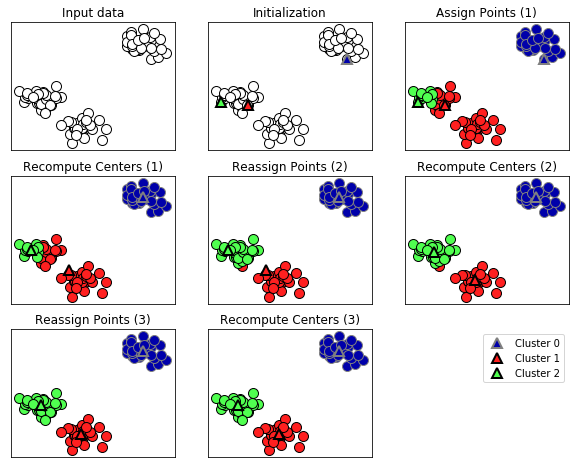

In [9]:
mglearn.plots.plot_kmeans_algorithm()

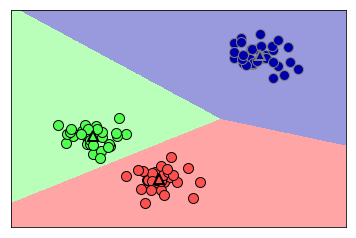

In [10]:
mglearn.plots.plot_kmeans_boundaries()

## Generate synthetic 2-d data

using <a href=https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html>make_blobs</a> (Note: if you set random_state, you generate the same data each time.)

In [11]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# generate synthetic two-dimensional data
X, y = make_blobs(random_state=1)

## Question 7
What are the types of X and y? Display their shapes.

In [12]:
type(X)

numpy.ndarray

In [13]:
print(X.shape,y.shape)

(100, 2) (100,)


## Question 8
Use <a href=https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html>kmeans</a> to build clusters with the data in X. Set the parameter <b>n_clusters</b> to 2.

In [14]:
# build the clustering model
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

## Visualize
You can use <b>discrete_scatter</b> to visualize your clusters. It's provided in helper functions for <a href= https://github.com/amueller/mglearn>Introduction to Machine Learning with Python: A Guide for Data Scientists</a>.




### Visualize data points in clusters
Here we use discrete_scatter to visualize all the data points in the clusters. The first two parameters are the two dimensions of the X array, which correspond to X and Y coordinates on a 2-d array. The third is the list of labels produced by kmeans, and the fourth parameter is the marker used, which can be "o", "^", "x", or some other choices.

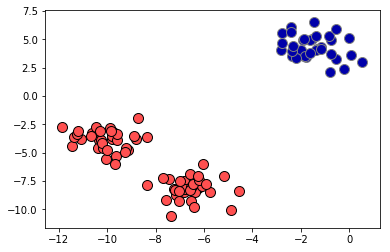

In [15]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], kmeans.labels_, markers='o')


### Visualize centroids  in clusters
Here we use discrete_scatter to visualize the centroids, ie., the cluster centers. The first two parameters are the two dimensions of the X array, which correspond to X and Y coordinates on a 2-d array. The third of the lenght corresponding to the number of centroids -- in this case, it should be [0,1]. The fourth parameter is the marker used, which can be "o", "^", "x", or some other choices.

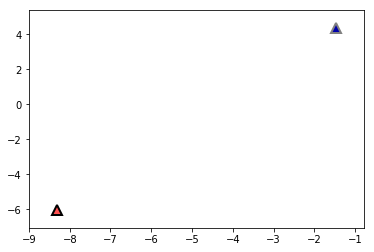

In [16]:
mglearn.discrete_scatter(
    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], [0, 1],
    markers='^', markeredgewidth=2)

## Question 9
Use discrete scatter twice to visualize both the data points and the centroids on the same 2-d plane.

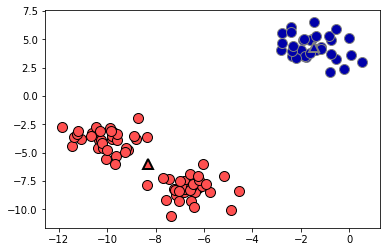

In [17]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], kmeans.labels_, markers='o')
mglearn.discrete_scatter(
    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], [0, 1],
    markers='^', markeredgewidth=2)

## Question 10
Now use <b>kmeans</b> to build 3 clusters, and visualize the results using discrete_scatter. 

<i>Note: to visualize the centroids, you use discrete_scatter as above. But now the 3rd argument should be the list </i>
<code>[0,1,2]</code>


In [18]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

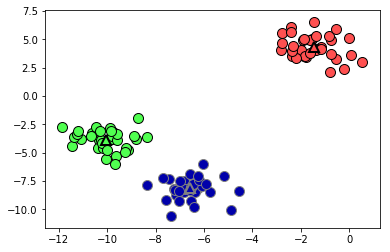

In [19]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], kmeans.labels_, markers='o')
mglearn.discrete_scatter(
    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], [0, 1,2],
    markers='^', markeredgewidth=2)